原始图像尺寸: 512x512
已将透视平行四边形图像保存到: output_parallelogram_cv.png


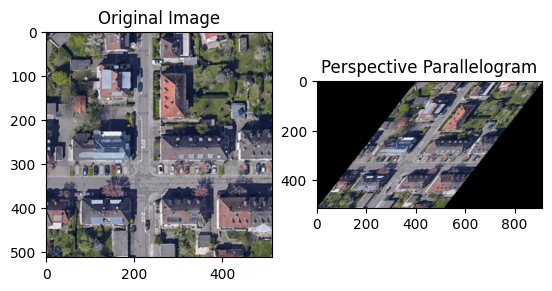

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # 用于显示图像 (可选)

def create_perspective_parallelogram_cv(image_path, output_path="output_parallelogram_cv.png"):
    """
    使用 OpenCV 将正方形图像转换为具有透视效果的平行四边形俯视图。

    参数:
        image_path (str): 输入图像的路径。
        output_path (str): 输出图像的保存路径。
    """
    # 1. 读取图像
    img = cv2.imread(image_path)
    if img is None:
        print(f"错误: 无法读取图像 {image_path}")
        return

    rows, cols, _ = img.shape
    print(f"原始图像尺寸: {rows}x{cols}")

    # 2. 定义源图像的四个角点 (顺序：左上, 右上, 左下, 右下)
    # 注意：OpenCV 的坐标系是 (x, y)，其中 x 是列，y 是行
    pts1 = np.float32([[0, 0],         # 左上
                       [cols - 1, 0],   # 右上
                       [0, rows - 1],   # 左下
                       [cols - 1, rows - 1]]) # 右下

    # 3. 定义目标平行四边形的四个角点
    # 你需要根据你想要的效果调整这些点。
    # 示例：让图像顶部窄，底部宽，模拟从上往下看的透视感
    # (可以调整这些值来改变平行四边形的形状和透视强度)
    top_left_x_offset = 30
    top_right_x_offset = cols - 1 - 30
    bottom_left_x_offset = 0
    bottom_right_x_offset = cols - 1

    # 保持 Y 坐标不变，只调整 X 坐标来形成平行四边形
    # pts2 = np.float32([[top_left_x_offset, 0],                  # 目标左上
    #                    [top_right_x_offset, 0],                 # 目标右上
    #                    [bottom_left_x_offset, rows - 1],        # 目标左下
    #                    [bottom_right_x_offset, rows - 1]])      # 目标右下

    # 或者，一个更常见的平行四边形效果（向一侧倾斜）
    trans = 400 # 向右移动50个像素
    pts2 = np.float32([[trans, 0],
                       [cols - 1 + trans, 0],
                       [0, rows - 1],        # 左下角向右移动
                       [cols - 1, rows - 1]]) # 右下角也向右移动
    
    # pts2 = np.float32([[0, 0],
    #                    [cols - 1, 0],
    #                    [trans, rows - 1],        # 左下角向右移动
    #                    [cols - 1 + trans, rows - 1]]) # 右下角也向右移动

    # 4. 计算透视变换矩阵
    M = cv2.getPerspectiveTransform(pts1, pts2)

    # 5. 应用透视变换
    # 输出图像的大小可以与原图相同，或者根据需要调整。
    # 如果目标平行四边形超出了原图的边界，你可能需要更大的输出尺寸。
    # 这里我们让输出图像的宽度适应变换后的形状，高度保持不变。
    # 计算变换后图像的宽度边界
    x_coords = pts2[:, 0]
    output_width = int(np.max(x_coords) - np.min(x_coords))
    output_height = rows # 或者根据 pts2 的 y 坐标计算

    # 为了确保所有内容都包含在内，可以取 pts2 x坐标的最大值作为宽度
    # dst_width = int(max(pts2[:,0]))
    # dst_height = rows

    # 使用 warpPerspective 进行变换
    # (cols, rows) 是输出图像的尺寸
    dst = cv2.warpPerspective(img, M, (cols+np.abs(trans), rows)) # 输出尺寸与原图一致

    # 如果想让输出图像适应平行四边形的精确边界，可以计算边界框
    # (x, y, w, h) = cv2.boundingRect(pts2.astype(np.int32))
    # dst_cropped = dst[y:y+h, x:x+w]
    # cv2.imwrite(output_path, dst_cropped)

    # 6. 保存或显示图像
    cv2.imwrite(output_path, dst)
    print(f"已将透视平行四边形图像保存到: {output_path}")

    # 可选：显示原始图像和变换后的图像
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Perspective Parallelogram')
    plt.show()

# --- 使用示例 ---
# 假设你有一张名为 "satellite_256x256.png" 的图片
# 请将 "your_satellite_image.png" 替换为你的图片路径
# 首先，创建一个虚拟的256x256图像用于测试
dummy_image = np.zeros((256, 256, 3), dtype=np.uint8)
# 画一些线条以便观察变换效果
cv2.line(dummy_image, (0,0), (255,255), (255,0,0), 2) # 蓝色对角线
cv2.line(dummy_image, (0,255), (255,0), (0,255,0), 2) # 绿色对角线
cv2.rectangle(dummy_image, (50,50), (200,200), (0,0,255), 3) # 红色矩形
cv2.imwrite("dummy_satellite_256x256.png", dummy_image)

create_perspective_parallelogram_cv("sat_img.png", "output_parallelogram_cv.png")
# 如果你有自己的卫星图，替换路径：
# create_perspective_parallelogram_cv("your_satellite_image.png", "output_parallelogram_cv.png")

Original image dimensions: Height=110, Width=379
Transformed image (left edge shifted) saved to: parallelogram_left_shifted_-150px.png
Output image dimensions: Width=378, Height=259


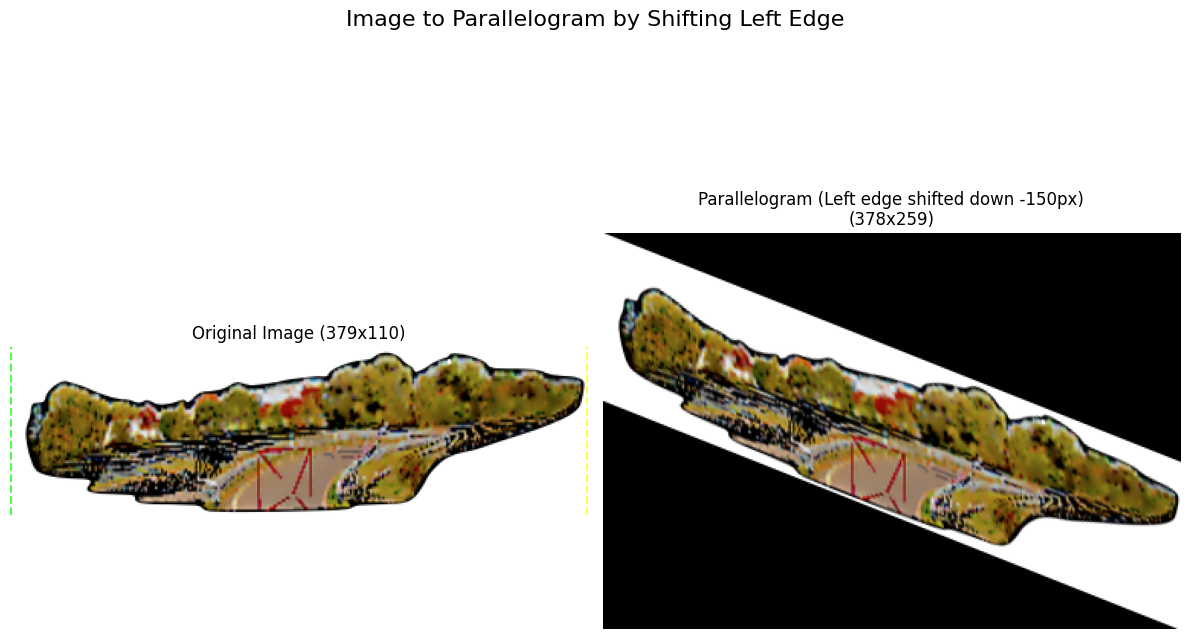

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_left_edge_down(image_path, output_path="parallelogram_left_edge_shifted.png", shift_pixels=100):
    """
    Shifts the leftmost edge of the image downwards by a specified number of pixels
    to form a parallelogram, without cropping the resulting image.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the transformed image.
        shift_pixels (int): The number of pixels to shift the left edge downwards.
    Returns:
        numpy.ndarray: The transformed image, or None if an error occurred.
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not find or read image {image_path}")
        return None

    h, w = img.shape[:2]
    print(f"Original image dimensions: Height={h}, Width={w}")

    # 1. Define the source points (corners of the original image)
    # Order: Top-Left, Top-Right, Bottom-Left, Bottom-Right
    pts_src = np.float32([
        [0, 0],             # Top-Left
        [w - 1, 0],         # Top-Right
        [0, h - 1],         # Bottom-Left
        [w - 1, h - 1]      # Bottom-Right
    ])

    # 2. Define the destination points for the parallelogram (before considering canvas translation)
    # Left edge shifts down
    tl_dst_x_raw = 0.0
    tl_dst_y_raw = 0.0 + shift_pixels
    bl_dst_x_raw = 0.0
    bl_dst_y_raw = float(h - 1) + shift_pixels

    # Right edge remains fixed
    tr_dst_x_raw = float(w - 1)
    tr_dst_y_raw = 0.0
    br_dst_x_raw = float(w - 1)
    br_dst_y_raw = float(h - 1)

    pts_dst_raw = np.float32([
        [tl_dst_x_raw, tl_dst_y_raw], # New Top-Left
        [tr_dst_x_raw, tr_dst_y_raw], # Original Top-Right
        [bl_dst_x_raw, bl_dst_y_raw], # New Bottom-Left
        [br_dst_x_raw, br_dst_y_raw]  # Original Bottom-Right
    ])

    # 3. Calculate the bounding box of the destination points to determine output size and translation
    all_x_coords = pts_dst_raw[:, 0] # Should be 0 and w-1
    all_y_coords = pts_dst_raw[:, 1]

    min_x = np.min(all_x_coords) # Should be 0
    max_x = np.max(all_x_coords) # Should be w-1
    min_y = np.min(all_y_coords) # Should be 0 (from TR)
    max_y = np.max(all_y_coords) # Should be h-1+shift_pixels (from new BL)

    # Translate points so the bounding box starts at (0,0) in the new canvas
    translate_x = -min_x # Will be 0 in this case
    translate_y = -min_y # Will be 0 in this case

    pts_dst_translated = np.float32([
        [pt[0] + translate_x, pt[1] + translate_y] for pt in pts_dst_raw
    ])
    
    output_width = int(np.ceil(max_x - min_x))   # Should be 'w'
    output_height = int(np.ceil(max_y - min_y))  # Should be 'h + shift_pixels'
    
    if output_width <= 0: output_width = 1 
    if output_height <= 0: output_height = 1

    # 4. Get the perspective transformation matrix (it will be an affine transform)
    M = cv2.getPerspectiveTransform(pts_src, pts_dst_translated)

    # 5. Warp the image using the new dimensions
    transformed_image = cv2.warpPerspective(img, M, (output_width, output_height))

    cv2.imwrite(output_path, transformed_image)
    print(f"Transformed image (left edge shifted) saved to: {output_path}")
    print(f"Output image dimensions: Width={output_width}, Height={output_height}")

    return transformed_image

if __name__ == '__main__':
    # Create a dummy image for testing if it doesn't exist
    dummy_image_file = "points.png"
    try:
        test_img_check = cv2.imread(dummy_image_file)
        if test_img_check is None:
            h_dummy, w_dummy = 200, 300 # Example: a rectangle
            dummy_img_cv = np.zeros((h_dummy, w_dummy, 3), dtype=np.uint8)
            # Draw a grid for visual effect
            for i in range(0, w_dummy, 20):
                cv2.line(dummy_img_cv, (i, 0), (i, h_dummy - 1), (50, 50, 50), 1)
            for i in range(0, h_dummy, 20):
                cv2.line(dummy_img_cv, (0, i), (w_dummy - 1, i), (50, 50, 50), 1)
            cv2.putText(dummy_img_cv, "TL", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2) # Blue
            cv2.putText(dummy_img_cv, "TR", (w_dummy - 60, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2) # Green
            cv2.putText(dummy_img_cv, "BL", (10, h_dummy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) # Red
            cv2.putText(dummy_img_cv, "BR", (w_dummy - 60, h_dummy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2) # Cyan
            cv2.rectangle(dummy_img_cv, (0,0), (w_dummy-1, h_dummy-1), (200,200,0), 2) # Border
            cv2.imwrite(dummy_image_file, dummy_img_cv)
            print(f"Created dummy image: {dummy_image_file}")
    except Exception as e:
        print(f"Error creating dummy image: {e}")

    # --- Perform the transformation and visualize ---
    shift_amount = -150
    output_file_name = f"parallelogram_left_shifted_{shift_amount}px.png"
    
    img_original_for_display = cv2.imread(dummy_image_file)
    
    img_transformed = shear_left_edge_down(
        dummy_image_file, 
        output_file_name,
        shift_pixels=shift_amount
    )

    if img_original_for_display is not None and img_transformed is not None:
        img_original_rgb = cv2.cvtColor(img_original_for_display, cv2.COLOR_BGR2RGB)
        img_transformed_rgb = cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(12, 8)) # Adjusted figsize for potentially taller image

        axes[0].imshow(img_original_rgb)
        axes[0].set_title(f"Original Image ({img_original_rgb.shape[1]}x{img_original_rgb.shape[0]})")
        axes[0].axvline(x=0, color='lime', linestyle='--', alpha=0.7) # Show left edge
        axes[0].axvline(x=img_original_rgb.shape[1]-1, color='yellow', linestyle='--', alpha=0.7) # Show right edge
        axes[0].axis('off') 

        axes[1].imshow(img_transformed_rgb)
        axes[1].set_title(f"Parallelogram (Left edge shifted down {shift_amount}px)\n({img_transformed_rgb.shape[1]}x{img_transformed_rgb.shape[0]})")
        axes[1].axis('off') 

        plt.suptitle("Image to Parallelogram by Shifting Left Edge", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()
    elif img_original_for_display is None:
        print(f"Error: Could not read original image {dummy_image_file} for display.")
    elif img_transformed is None:
        print("Error: Transformed image was not generated, cannot display.")

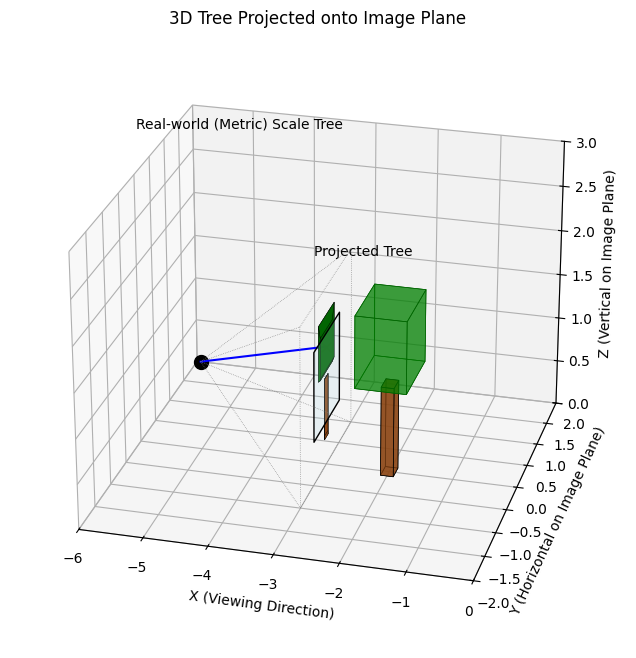

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

# --- 定义相机和图像平面参数 ---
cam1_pos = np.array([-5, 0, 1])
image_plane_x_coord = -3.0
# 焦距是相机到图像平面的距离 (沿着主轴，这里是X轴)
focal_distance = image_plane_x_coord - cam1_pos[0]

# --- 投影函数 ---
def project_point_to_image_plane(p_world, camera_pos, img_plane_x, foc_dist):
    """
    Projects a 3D point onto the image plane.
    Assumes camera looks along positive X-axis, and image plane is x = constant.
    Args:
        p_world (np.array): 3D point in world coordinates (Xw, Yw, Zw).
        camera_pos (np.array): Camera position (Cx, Cy, Cz).
        img_plane_x (float): The X-coordinate of the image plane.
        foc_dist (float): Focal distance from camera to image plane.
    Returns:
        np.array or None: Projected 3D point on the image plane, or None if point is behind camera.
    """
    Cx, Cy, Cz = camera_pos
    Xw, Yw, Zw = p_world

    # Depth of the point from the camera along the viewing axis (X-axis)
    depth = Xw - Cx
    
    if depth <= 1e-6:  # Avoid division by zero or projecting points behind/at the camera
        return None

    # Perspective projection formulas:
    # y_image_on_plane = Cy + (Yw - Cy) * foc_dist / depth
    # z_image_on_plane = Cz + (Zw - Cz) * foc_dist / depth
    # x_image_on_plane is constant (img_plane_x)

    projected_y = Cy + (Yw - Cy) * (foc_dist / depth)
    projected_z = Cz + (Zw - Cz) * (foc_dist / depth)
    
    return np.array([img_plane_x, projected_y, projected_z])

# --- 获取立方体顶点的辅助函数 ---
def get_cube_vertices(center_pos, dimensions):
    """
    Calculates the 8 vertices of a cube given its center position and dimensions.
    Args:
        center_pos (np.array): (cx, cy, cz) of the cube's center.
        dimensions (np.array): (dx, dy, dz) - full width, depth, height of the cube.
    Returns:
        list of np.array: List of 8 vertex coordinates.
    """
    cx, cy, cz = center_pos
    dx, dy, dz = dimensions
    
    half_dx, half_dy, half_dz = dx / 2.0, dy / 2.0, dz / 2.0
    
    vertices = [
        np.array([cx - half_dx, cy - half_dy, cz - half_dz]),  # 0: back-bottom-left
        np.array([cx + half_dx, cy - half_dy, cz - half_dz]),  # 1: front-bottom-left
        np.array([cx + half_dx, cy + half_dy, cz - half_dz]),  # 2: front-bottom-right
        np.array([cx - half_dx, cy + half_dy, cz - half_dz]),  # 3: back-bottom-right
        
        np.array([cx - half_dx, cy - half_dy, cz + half_dz]),  # 4: back-top-left
        np.array([cx + half_dx, cy - half_dy, cz + half_dz]),  # 5: front-top-left
        np.array([cx + half_dx, cy + half_dy, cz + half_dz]),  # 6: front-top-right
        np.array([cx - half_dx, cy + half_dy, cz + half_dz])   # 7: back-top-right
    ]
    return vertices

# --- 定义立方体面的辅助函数 ---
def get_cube_faces(vertices):
    """ Defines the 6 faces of a cube from its 8 vertices (ordered as in get_cube_vertices). """
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face (using my Z as depth)
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # Left face
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # Right face
    ]
    return faces

# --- 主绘图逻辑 ---
fig = plt.figure(figsize=(12, 8)) # 稍微调整画布大小
ax = fig.add_subplot(111, projection='3d')

# --- 绘制相机1 (简化为点和视锥线) ---
ax.scatter(cam1_pos[0], cam1_pos[1], cam1_pos[2], c='k', marker='o', s=100, label="Camera 1")
frustum1_pts_world = [
    cam1_pos,
    np.array([image_plane_x_coord, -1, 0]), np.array([image_plane_x_coord, 1, 0]), # Adjusted frustum to image plane x
    np.array([image_plane_x_coord, 1, 2]), np.array([image_plane_x_coord, -1, 2])
]
lines1 = [
    [frustum1_pts_world[0], frustum1_pts_world[1]], [frustum1_pts_world[0], frustum1_pts_world[2]],
    [frustum1_pts_world[0], frustum1_pts_world[3]], [frustum1_pts_world[0], frustum1_pts_world[4]],
    [frustum1_pts_world[1], frustum1_pts_world[2]], [frustum1_pts_world[2], frustum1_pts_world[3]],
    [frustum1_pts_world[3], frustum1_pts_world[4]], [frustum1_pts_world[4], frustum1_pts_world[1]]
]
ax.add_collection3d(Line3DCollection(lines1, colors='gray', linewidths=0.5, linestyles=':'))

# --- 图像平面 (示意) ---
img_plane_center_y = 0
img_plane_center_z = 1 # 与相机 Cz 对齐
img_plane_width_y = 1.0 # 对应原图 Y 方向的宽度
img_plane_height_z = 1.0 # 对应原图 Z 方向的高度

img_plane1_verts = [
    np.array([image_plane_x_coord, img_plane_center_y - img_plane_width_y/2, img_plane_center_z - img_plane_height_z/2]),
    np.array([image_plane_x_coord, img_plane_center_y + img_plane_width_y/2, img_plane_center_z - img_plane_height_z/2]),
    np.array([image_plane_x_coord, img_plane_center_y + img_plane_width_y/2, img_plane_center_z + img_plane_height_z/2]),
    np.array([image_plane_x_coord, img_plane_center_y - img_plane_width_y/2, img_plane_center_z + img_plane_height_z/2])
]
ax.add_collection3d(Poly3DCollection([img_plane1_verts], facecolors='lightblue', linewidths=1, alpha=0.2, edgecolors='k'))


# --- 定义3D空间中的树 ---
# 树干 (Trunk)
trunk1_center_pos = np.array([-2, 0, 0.5]) # 中心 (x,y,z)
trunk1_dims = np.array([0.2, 0.2, 1])   # 尺寸 (width, depth, height)
trunk1_world_vertices = get_cube_vertices(trunk1_center_pos, trunk1_dims)
trunk1_faces_world = get_cube_faces(trunk1_world_vertices)
ax.add_collection3d(Poly3DCollection(trunk1_faces_world, facecolors='saddlebrown', linewidths=0.5, edgecolors='k', alpha=0.7))

# 树冠 (Canopy)
canopy1_center_pos = np.array([-2, 0, 1.5]) # 中心 (x,y,z)
canopy1_dims = np.array([0.8, 0.8, 0.8])   # 尺寸 (width, depth, height)
canopy1_world_vertices = get_cube_vertices(canopy1_center_pos, canopy1_dims)
canopy1_faces_world = get_cube_faces(canopy1_world_vertices)
ax.add_collection3d(Poly3DCollection(canopy1_faces_world, facecolors='green', linewidths=0.5, edgecolors='darkgreen', alpha=0.5))


# --- 投影树到图像平面 ---
# 投影树干
projected_trunk_vertices = []
for v in trunk1_world_vertices:
    pv = project_point_to_image_plane(v, cam1_pos, image_plane_x_coord, focal_distance)
    if pv is not None:
        projected_trunk_vertices.append(pv)
    else: # 如果有点投影不了（例如在相机后面），则不画这个投影
        projected_trunk_vertices = [] # 清空，避免部分投影
        print(f"警告：树干的一个顶点 {v} 无法投影。")
        break

if len(projected_trunk_vertices) == 8:
    projected_trunk_faces = get_cube_faces(projected_trunk_vertices)
    ax.add_collection3d(Poly3DCollection(projected_trunk_faces, facecolors='saddlebrown', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3)) # zorder 使其在图像平面之上

# 投影树冠
projected_canopy_vertices = []
for v in canopy1_world_vertices:
    pv = project_point_to_image_plane(v, cam1_pos, image_plane_x_coord, focal_distance)
    if pv is not None:
        projected_canopy_vertices.append(pv)
    else:
        projected_canopy_vertices = []
        print(f"警告：树冠的一个顶点 {v} 无法投影。")
        break

if len(projected_canopy_vertices) == 8:
    projected_canopy_faces = get_cube_faces(projected_canopy_vertices)
    ax.add_collection3d(Poly3DCollection(projected_canopy_faces, facecolors='darkgreen', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))


# --- 绘制射线 (示意) ---
# 使射线指向树冠中心在图像平面上的投影
projected_canopy_center = project_point_to_image_plane(canopy1_center_pos, cam1_pos, image_plane_x_coord, focal_distance)
if projected_canopy_center is not None:
    ax.plot([cam1_pos[0], projected_canopy_center[0]], 
            [cam1_pos[1], projected_canopy_center[1]], 
            [cam1_pos[2], projected_canopy_center[2]], 'b-', linewidth=1.5, zorder=4)
    # 标记投影点
    ax.scatter(projected_canopy_center[0], projected_canopy_center[1], projected_canopy_center[2], c='red', marker='x', s=50, zorder=5)


# --- 添加注释 (非常基础的) ---
ax.text(-5, 1.5, 3, "Real-world (Metric) Scale Tree", color='black', ha='center')
ax.text(image_plane_x_coord, 1.5, img_plane_center_z + img_plane_height_z / 2 + 0.2, "Projected Tree", color='black', ha='center')


# --- 设置坐标轴和视角 ---
ax.set_xlabel('X (Viewing Direction)')
ax.set_ylabel('Y (Horizontal on Image Plane)')
ax.set_zlabel('Z (Vertical on Image Plane)')
ax.set_xlim([-6, 0]) # 调整X轴范围以更好地显示投影
ax.set_ylim([-2, 2])
ax.set_zlim([0, 3])
ax.view_init(elev=25, azim=-75) # 调整视角

plt.title("3D Tree Projected onto Image Plane")
plt.show()

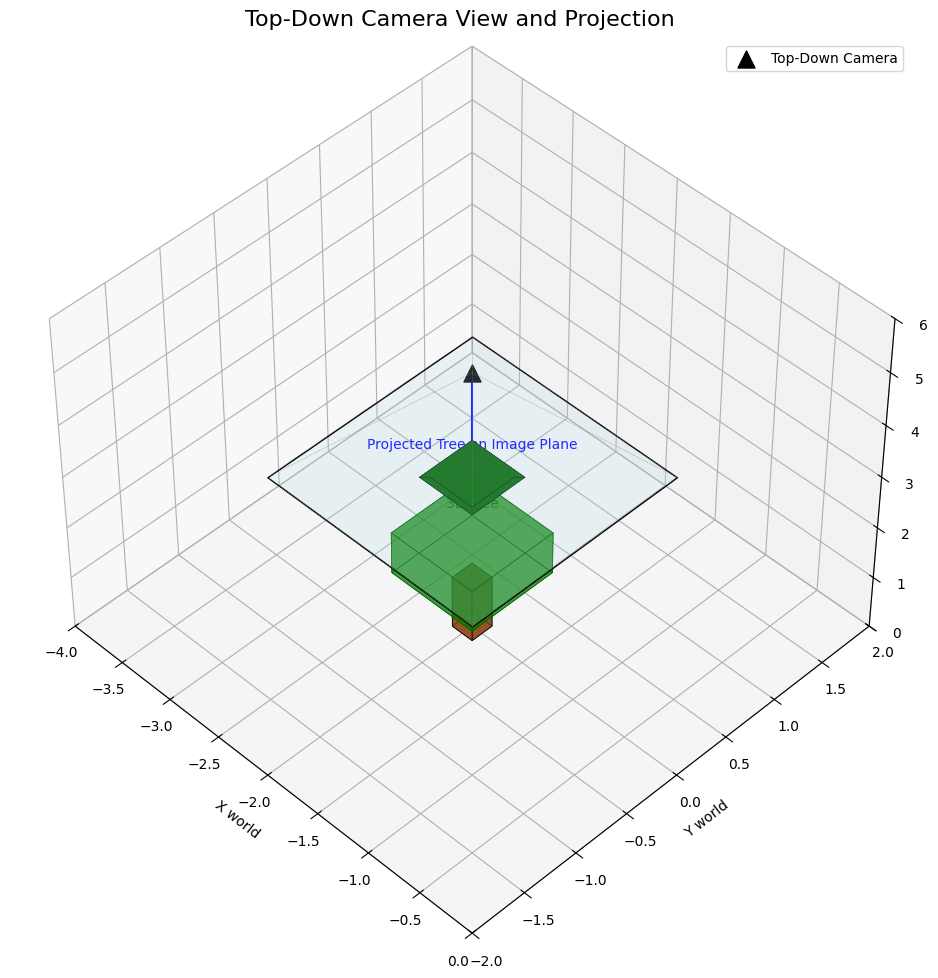

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

# --- (前面的函数定义：project_point_top_down, get_cube_vertices, get_cube_faces) ---
# --- 定义新的相机（俯视）和图像平面参数 ---
tree_center_x = -2.0
tree_center_y = 0.0
camera_height_z = 5.0 
cam_pos_top_down = np.array([tree_center_x, tree_center_y, camera_height_z])
image_plane_z_level = 3.0 
if image_plane_z_level >= camera_height_z:
    image_plane_z_level = camera_height_z - 2.0
focal_distance_td = camera_height_z - image_plane_z_level

def project_point_top_down(p_world, camera_pos, img_plane_z, foc_dist):
    Cx, Cy, Cz_cam = camera_pos
    Xw, Yw, Zw = p_world
    depth = Cz_cam - Zw 
    if depth <= 1e-6: return None
    projected_x = Cx + (Xw - Cx) * (foc_dist / depth)
    projected_y = Cy + (Yw - Cy) * (foc_dist / depth)
    return np.array([projected_x, projected_y, img_plane_z])

def get_cube_vertices(center_pos, dimensions):
    cx, cy, cz = center_pos; dx, dy, dz = dimensions
    h_dx, h_dy, h_dz = dx / 2.0, dy / 2.0, dz / 2.0
    return [
        np.array([cx - h_dx, cy - h_dy, cz - h_dz]), np.array([cx + h_dx, cy - h_dy, cz - h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz - h_dz]), np.array([cx - h_dx, cy + h_dy, cz - h_dz]),
        np.array([cx - h_dx, cy - h_dy, cz + h_dz]), np.array([cx + h_dx, cy - h_dy, cz + h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz + h_dz]), np.array([cx - h_dx, cy + h_dy, cz + h_dz])
    ]

def get_cube_faces(vertices):
    return [
        [vertices[0], vertices[1], vertices[2], vertices[3]], [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]], [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[3], vertices[7], vertices[4]], [vertices[1], vertices[2], vertices[6], vertices[5]]
    ]

# --- 主绘图逻辑 ---
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cam_pos_top_down[0], cam_pos_top_down[1], cam_pos_top_down[2], 
           c='black', marker='^', s=150, label="Top-Down Camera", depthshade=False) 

img_plane_width_x_world = 2.0 
img_plane_height_y_world = 2.0
ip_center_x, ip_center_y = cam_pos_top_down[0], cam_pos_top_down[1]
ip_tl_td = np.array([ip_center_x - img_plane_width_x_world/2, ip_center_y - img_plane_height_y_world/2, image_plane_z_level])
ip_tr_td = np.array([ip_center_x + img_plane_width_x_world/2, ip_center_y - img_plane_height_y_world/2, image_plane_z_level])
ip_br_td = np.array([ip_center_x + img_plane_width_x_world/2, ip_center_y + img_plane_height_y_world/2, image_plane_z_level])
ip_bl_td = np.array([ip_center_x - img_plane_width_x_world/2, ip_center_y + img_plane_height_y_world/2, image_plane_z_level])
img_plane_td_verts = [ip_tl_td, ip_tr_td, ip_br_td, ip_bl_td]
ax.add_collection3d(Poly3DCollection([img_plane_td_verts], facecolors='lightblue', linewidths=1, alpha=0.2, edgecolors='k'))

frustum_lines_td = [
    [cam_pos_top_down, ip_tl_td], [cam_pos_top_down, ip_tr_td],
    [cam_pos_top_down, ip_br_td], [cam_pos_top_down, ip_bl_td],
    [ip_tl_td, ip_tr_td], [ip_tr_td, ip_br_td], [ip_br_td, ip_bl_td], [ip_bl_td, ip_tl_td]
]
ax.add_collection3d(Line3DCollection(frustum_lines_td, colors='gray', linewidths=0.5, linestyles=':'))

trunk1_center_pos = np.array([-2, 0, 0.5]) 
trunk1_dims = np.array([0.2, 0.2, 1])   
trunk1_world_vertices = get_cube_vertices(trunk1_center_pos, trunk1_dims)
trunk1_faces_world = get_cube_faces(trunk1_world_vertices)
ax.add_collection3d(Poly3DCollection(trunk1_faces_world, facecolors='saddlebrown', linewidths=0.5, edgecolors='k', alpha=0.7))

canopy1_center_pos = np.array([-2, 0, 1.5]) 
canopy1_dims = np.array([0.8, 0.8, 0.8])  
canopy1_world_vertices = get_cube_vertices(canopy1_center_pos, canopy1_dims)
canopy1_faces_world = get_cube_faces(canopy1_world_vertices)
ax.add_collection3d(Poly3DCollection(canopy1_faces_world, facecolors='green', linewidths=0.5, edgecolors='darkgreen', alpha=0.5))

projected_trunk_vertices_td = []
for v_world in trunk1_world_vertices:
    pv_td = project_point_top_down(v_world, cam_pos_top_down, image_plane_z_level, focal_distance_td)
    if pv_td is not None: projected_trunk_vertices_td.append(pv_td)
    else: projected_trunk_vertices_td = []; print(f"Warning: Trunk vertex {v_world} could not be projected."); break
if len(projected_trunk_vertices_td) == 8:
    projected_trunk_faces_td = get_cube_faces(projected_trunk_vertices_td)
    ax.add_collection3d(Poly3DCollection(projected_trunk_faces_td, facecolors='saddlebrown', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))

projected_canopy_vertices_td = []
for v_world in canopy1_world_vertices:
    pv_td = project_point_top_down(v_world, cam_pos_top_down, image_plane_z_level, focal_distance_td)
    if pv_td is not None: projected_canopy_vertices_td.append(pv_td)
    else: projected_canopy_vertices_td = []; print(f"Warning: Canopy vertex {v_world} could not be projected."); break
if len(projected_canopy_vertices_td) == 8:
    projected_canopy_faces_td = get_cube_faces(projected_canopy_vertices_td)
    ax.add_collection3d(Poly3DCollection(projected_canopy_faces_td, facecolors='darkgreen', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))

projected_canopy_center_td = project_point_top_down(canopy1_center_pos, cam_pos_top_down, image_plane_z_level, focal_distance_td)
if projected_canopy_center_td is not None:
    ax.plot([cam_pos_top_down[0], projected_canopy_center_td[0]], 
            [cam_pos_top_down[1], projected_canopy_center_td[1]], 
            [cam_pos_top_down[2], projected_canopy_center_td[2]], 'blue', linewidth=1.5, zorder=4)
    ax.scatter(projected_canopy_center_td[0], projected_canopy_center_td[1], projected_canopy_center_td[2], 
               c='red', marker='x', s=50, zorder=5, depthshade=False)

ax.text(tree_center_x, tree_center_y, np.max([v[2] for v in canopy1_world_vertices]) + 0.5, "3D Tree", color='darkgreen', ha='center')
ax.text(cam_pos_top_down[0], cam_pos_top_down[1], image_plane_z_level + 0.5, "Projected Tree on Image Plane", color='blue', ha='center', va='bottom')

ax.set_xlabel("X world")
ax.set_ylabel("Y world")
ax.set_zlabel("Z world") # 这是可能被裁剪的标签

all_x = [cam_pos_top_down[0]] + [v[0] for v in trunk1_world_vertices] + [v[0] for v in img_plane_td_verts]
all_y = [cam_pos_top_down[1]] + [v[1] for v in trunk1_world_vertices] + [v[1] for v in img_plane_td_verts]
all_z = [cam_pos_top_down[2]] + [v[2] for v in trunk1_world_vertices] + [v[2] for v in img_plane_td_verts] + [image_plane_z_level]
ax.set_xlim([min(all_x)-1, max(all_x)+1])
ax.set_ylim([min(all_y)-1, max(all_y)+1])
ax.set_zlim([0, max(all_z)+1]) 
ax.view_init(elev=45, azim=-45) 

plt.suptitle("Top-Down Camera View and Projection", fontsize=16) # 总标题

# --- 尝试解决标签裁剪问题的修改 ---
# 方案 1: 使用 fig.tight_layout()，它通常比 plt.tight_layout() 更能处理好 Axes3D
# fig.tight_layout(rect=[0, 0, 1, 0.95]) # rect 为总标题留出空间

# # 方案 2: 使用 subplots_adjust 明确增加底部空间
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95) # 增加 bottom

# # 方案 3: 增加Z轴标签的边距 (可以和上面方案之一结合)
ax.zaxis.labelpad = 20 # 增加这个值，将标签向外推

plt.legend()
plt.show()

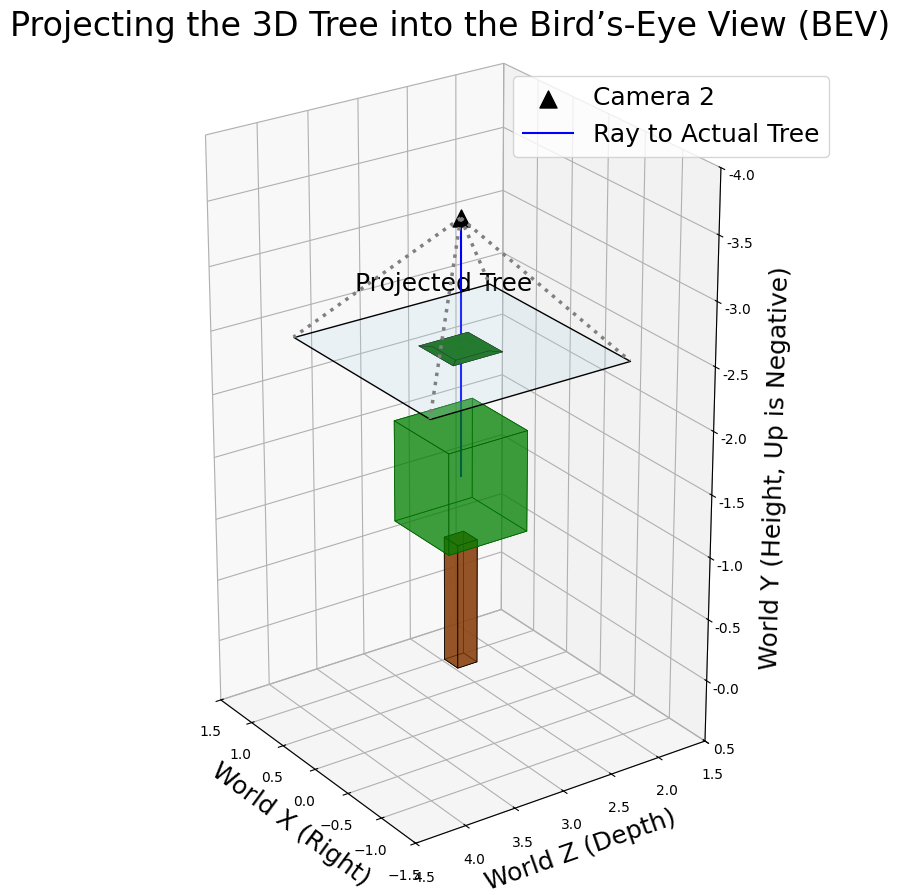

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
from matplotlib.ticker import FuncFormatter

# --- Define OpenCV-style Coordinate System Parameters for Top-Down View ---
# World X_cv: Right
# World Y_cv: Down (positive Y_cv values go downwards, negative Y_cv values go upwards/higher)
# World Z_cv: Into Scene (Depth from camera's perspective in its XY plane)

# --- Scene and Camera Parameters (OpenCV coordinates) ---
tree_center_x_cv = 0.0  # Tree is at X=0
tree_center_z_cv = 3.0

camera_y_above_ground = 3.5 # How "high" the camera is. In Y_cv (down), this is negative.
cam_y_cv = -camera_y_above_ground # e.g., -3.5

# Camera positioned above the tree center
cam_pos_cv = np.array([tree_center_x_cv, cam_y_cv, tree_center_z_cv])

# Image plane "height" (Y_cv coordinate)
image_plane_y_cv = -2.5 # Must be "below" camera (less negative or positive Y_cv)
if image_plane_y_cv >= cam_y_cv: # Ensure image plane is below camera
    image_plane_y_cv = cam_y_cv + 1.0 # Place it 1 unit below camera if initial was wrong

# Focal length: distance from camera's Y to image plane's Y.
focal_length_cv = image_plane_y_cv - cam_pos_cv[1]
if focal_length_cv <= 0:
    print(f"Warning: Focal length ({focal_length_cv}) is not positive. Check camera and image plane Y positions.")
    focal_length_cv = 1.0 # Default to a positive value

# --- Helper function to convert CV world coordinates to Matplotlib plot coordinates ---
# Matplotlib X <- X_cv
# Matplotlib Y <- Z_cv (Depth)
# Matplotlib Z <- -Y_cv (World Y_cv "up" is negative, so -Y_cv makes "up" positive for Matplotlib Z-axis plotting)
def to_plot_coords(p_cv):
    if p_cv is None:
        return None
    return np.array([p_cv[0], p_cv[2], -p_cv[1]])

# --- Projection function for Top-Down View (OpenCV style) ---
def project_point_top_down_cv(p_world_cv, camera_pos_cv, img_plane_world_y_cv, foc_len_cv):
    """
    Projects a 3D point in OpenCV world coordinates to an image plane for a top-down camera.
    Camera is assumed to be looking along the +Y_cv axis (downwards).
    Image plane is parallel to XZ_cv plane.
    """
    Cx_cv, Cy_cam_cv, Cz_cam_cv = camera_pos_cv
    Xw_cv, Yw_cv, Zw_cv = p_world_cv
    depth_along_y = Yw_cv - Cy_cam_cv
    if abs(depth_along_y) < 1e-6 or depth_along_y <= 0:
        return None
    projected_x_world = Cx_cv + (Xw_cv - Cx_cv) * (foc_len_cv / depth_along_y)
    projected_z_world = Cz_cam_cv + (Zw_cv - Cz_cam_cv) * (foc_len_cv / depth_along_y)
    return np.array([projected_x_world, img_plane_world_y_cv, projected_z_world])

# --- Cube vertices and faces helper functions ---
def get_cube_vertices(center_pos_cv, dimensions_cv):
    cx, cy, cz = center_pos_cv; dx, dy, dz = dimensions_cv
    h_dx, h_dy, h_dz = dx / 2.0, dy / 2.0, dz / 2.0
    return [
        np.array([cx - h_dx, cy - h_dy, cz - h_dz]), np.array([cx + h_dx, cy - h_dy, cz - h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz - h_dz]), np.array([cx - h_dx, cy + h_dy, cz - h_dz]),
        np.array([cx - h_dx, cy - h_dy, cz + h_dz]), np.array([cx + h_dx, cy - h_dy, cz + h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz + h_dz]), np.array([cx - h_dx, cy + h_dy, cz + h_dz])
    ]

def get_cube_faces(vertices_cv):
    return [
        [vertices_cv[0], vertices_cv[1], vertices_cv[2], vertices_cv[3]],
        [vertices_cv[4], vertices_cv[5], vertices_cv[6], vertices_cv[7]],
        [vertices_cv[0], vertices_cv[1], vertices_cv[5], vertices_cv[4]],
        [vertices_cv[2], vertices_cv[3], vertices_cv[7], vertices_cv[6]],
        [vertices_cv[0], vertices_cv[3], vertices_cv[7], vertices_cv[4]],
        [vertices_cv[1], vertices_cv[2], vertices_cv[6], vertices_cv[5]]
    ]

# --- Main plotting logic ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

all_plot_points_x, all_plot_points_y, all_plot_points_z = [], [], []
def add_points_for_bounds(plot_points_list):
    for p_plot in plot_points_list:
        if p_plot is not None:
            all_plot_points_x.append(p_plot[0])
            all_plot_points_y.append(p_plot[1])
            all_plot_points_z.append(p_plot[2])

# --- Draw Camera ---
cam_plot_pos = to_plot_coords(cam_pos_cv)
ax.scatter(cam_plot_pos[0], cam_plot_pos[1], cam_plot_pos[2],
           c='black', marker='^', s=150, label="Camera 2", depthshade=False)
add_points_for_bounds([cam_plot_pos])

# --- Draw Image Plane ---
img_plane_width_x_cv = 2.0
img_plane_depth_z_cv = 2.0
ip_center_x_cv = cam_pos_cv[0] # Image plane X is also at 0 because cam_pos_cv[0] is tree_center_x_cv
ip_center_z_cv = cam_pos_cv[2]

ip_verts_cv = [
    np.array([ip_center_x_cv - img_plane_width_x_cv/2, image_plane_y_cv, ip_center_z_cv - img_plane_depth_z_cv/2]),
    np.array([ip_center_x_cv + img_plane_width_x_cv/2, image_plane_y_cv, ip_center_z_cv - img_plane_depth_z_cv/2]),
    np.array([ip_center_x_cv + img_plane_width_x_cv/2, image_plane_y_cv, ip_center_z_cv + img_plane_depth_z_cv/2]),
    np.array([ip_center_x_cv - img_plane_width_x_cv/2, image_plane_y_cv, ip_center_z_cv + img_plane_depth_z_cv/2])
]
ip_verts_plot = [to_plot_coords(p) for p in ip_verts_cv]
ax.add_collection3d(Poly3DCollection([ip_verts_plot], facecolors='lightblue', linewidths=1, alpha=0.2, edgecolors='k'))
add_points_for_bounds(ip_verts_plot)

# --- Draw Frustum Lines ---
frustum_lines_plot = []
for p_ip_cv in ip_verts_cv:
    frustum_lines_plot.append([cam_plot_pos, to_plot_coords(p_ip_cv)])
ax.add_collection3d(Line3DCollection(frustum_lines_plot, colors='gray', linewidths=2.5, linestyles=':'))

# --- Define 3D Tree in OpenCV Coordinates ---
trunk_center_pos_cv = np.array([tree_center_x_cv, -0.5, tree_center_z_cv])
trunk_dims_cv = np.array([0.2, 1.0, 0.2])
trunk_world_verts_cv = get_cube_vertices(trunk_center_pos_cv, trunk_dims_cv)
trunk_faces_plot = get_cube_faces([to_plot_coords(v) for v in trunk_world_verts_cv])
ax.add_collection3d(Poly3DCollection(trunk_faces_plot, facecolors='saddlebrown', linewidths=0.5, edgecolors='k', alpha=0.7))
add_points_for_bounds([to_plot_coords(v) for v in trunk_world_verts_cv])

canopy_center_pos_cv = np.array([tree_center_x_cv, -1.5, tree_center_z_cv]) # Actual 3D center of canopy
canopy_dims_cv = np.array([0.8, 0.8, 0.8])
canopy_world_verts_cv = get_cube_vertices(canopy_center_pos_cv, canopy_dims_cv)
canopy_faces_plot = get_cube_faces([to_plot_coords(v) for v in canopy_world_verts_cv])
ax.add_collection3d(Poly3DCollection(canopy_faces_plot, facecolors='green', linewidths=0.5, edgecolors='darkgreen', alpha=0.5))
add_points_for_bounds([to_plot_coords(v) for v in canopy_world_verts_cv])
add_points_for_bounds([to_plot_coords(canopy_center_pos_cv)]) # Ensure actual canopy center is in bounds

# --- Project Tree to Image Plane ---
projected_trunk_verts_plot = []
valid_proj_trunk = True
for v_cv in trunk_world_verts_cv:
    pv_cv = project_point_top_down_cv(v_cv, cam_pos_cv, image_plane_y_cv, focal_length_cv)
    if pv_cv is None: valid_proj_trunk = False; break
    projected_trunk_verts_plot.append(to_plot_coords(pv_cv))
if valid_proj_trunk and len(projected_trunk_verts_plot) == 8:
    projected_trunk_faces_plot = get_cube_faces(projected_trunk_verts_plot)
    ax.add_collection3d(Poly3DCollection(projected_trunk_faces_plot, facecolors='saddlebrown', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))
    add_points_for_bounds(projected_trunk_verts_plot)

projected_canopy_verts_plot = []
valid_proj_canopy = True
for v_cv in canopy_world_verts_cv:
    pv_cv = project_point_top_down_cv(v_cv, cam_pos_cv, image_plane_y_cv, focal_length_cv)
    if pv_cv is None: valid_proj_canopy = False; break
    projected_canopy_verts_plot.append(to_plot_coords(pv_cv))
if valid_proj_canopy and len(projected_canopy_verts_plot) == 8:
    projected_canopy_faces_plot = get_cube_faces(projected_canopy_verts_plot)
    ax.add_collection3d(Poly3DCollection(projected_canopy_faces_plot, facecolors='darkgreen', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))
    add_points_for_bounds(projected_canopy_verts_plot)

# --- Draw Ray from Camera to ACTUAL 3D Canopy Center ---
actual_canopy_center_plot = to_plot_coords(canopy_center_pos_cv)
if cam_plot_pos is not None and actual_canopy_center_plot is not None:
    ax.plot([cam_plot_pos[0], actual_canopy_center_plot[0]],
            [cam_plot_pos[1], actual_canopy_center_plot[1]],
            [cam_plot_pos[2], actual_canopy_center_plot[2]], 'blue', linewidth=1.5, zorder=4, label="Ray to Actual Tree")

# --- Annotations ---
text_proj_tree_pos_cv = np.array([ip_center_x_cv, image_plane_y_cv - 0.3, ip_center_z_cv]) # Adjusted for clarity
text_proj_tree_plot = to_plot_coords(text_proj_tree_pos_cv)
if text_proj_tree_plot is not None:
    ax.text(text_proj_tree_plot[0] + 0.1, text_proj_tree_plot[1] + 0.1, text_proj_tree_plot[2] + 0.1,
            "Projected Tree", color='black', ha='center', va='bottom', fontsize=18)

# --- Axis Setup ---
ax.set_xlabel("World X (Right)", fontsize=18)
ax.set_ylabel("World Z (Depth)", fontsize=18)
ax.set_zlabel("World Y (Height, Up is Negative)", fontsize=18)

def y_world_tick_formatter(z_tick_value, pos):
    return f"{-z_tick_value:.1f}"
ax.zaxis.set_major_formatter(FuncFormatter(y_world_tick_formatter))

if all_plot_points_x and all_plot_points_y and all_plot_points_z:
    padding = 0.5
    min_x_data, max_x_data = min(all_plot_points_x), max(all_plot_points_x)
    min_y_data, max_y_data = min(all_plot_points_y), max(all_plot_points_y)
    min_z_data, max_z_data = min(all_plot_points_z), max(all_plot_points_z)

    ax.set_xlim([min_x_data - padding, max_x_data + padding])
    ax.set_ylim([min_y_data - padding, max_y_data + padding])
    ax.set_zlim([min_z_data - padding, max_z_data + padding])

    data_range_x = max_x_data - min_x_data
    data_range_y = max_y_data - min_y_data
    data_range_z = max_z_data - min_z_data

    safe_range_x = data_range_x if data_range_x > 0.1 else 1.0
    safe_range_y = data_range_y if data_range_y > 0.1 else 1.0
    safe_range_z = data_range_z if data_range_z > 0.1 else 1.0

    ax.set_box_aspect((safe_range_x, safe_range_y, safe_range_z))
else:
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 5]); ax.set_zlim([0, 4])
    ax.set_box_aspect((1,1.5,1))

ax.view_init(elev=25, azim=145)
plt.suptitle("Projecting the 3D Tree into the Bird’s-Eye View (BEV)", fontsize=24)
ax.zaxis.labelpad = 15
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.92)
plt.legend(fontsize=18) # Set font size for all legend items
plt.show()

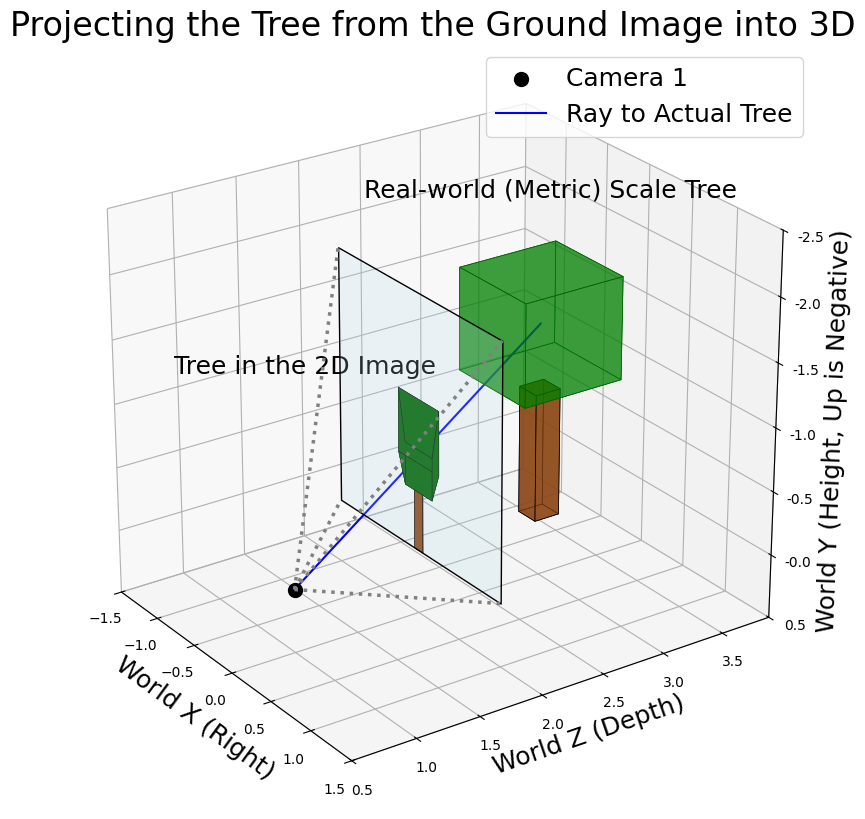

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
from matplotlib.ticker import FuncFormatter # 导入FuncFormatter

# --- Define OpenCV-style Coordinate System Parameters ---
# World X: Right
# World Y: Down (meaning positive Y_cv values go downwards, negative Y_cv values go upwards)
# World Z: Into Scene (Depth)

# --- Z-axis offset to move the entire scene ---
z_offset = 5.0 # Shift amount to move from negative Z to positive Z

# Camera looking along its +Z axis
cam_cv_pos = np.array([0.0, 0.0, -4.0 + z_offset])  # Camera at (X=0, Y=0, Z=1 world)
image_plane_z_cv = -3.0 + z_offset                  # Image plane at Z=2 world
focal_length = image_plane_z_cv - cam_cv_pos[2] # Distance from camera center to image plane (remains 1.0)

# --- Helper function to convert CV coordinates to Matplotlib plot coordinates ---
# Matplotlib X <- X_cv
# Matplotlib Y <- Z_cv (Depth)
# Matplotlib Z <- -Y_cv (Y_cv "up" is negative, so -Y_cv makes "up" positive for Matplotlib Z-axis plotting)
def to_plot_coords(p_cv):
    if p_cv is None:
        return None
    return np.array([p_cv[0], p_cv[2], -p_cv[1]])

# --- Projection function (OpenCV style) ---
def project_point_to_image_plane_cv(p_world_cv, camera_pos_cv, img_plane_world_z_cv, foc_len):
    """
    Projects a 3D point in OpenCV world coordinates to the image plane.
    Args:
        p_world_cv (np.array): Point in world (X_cv, Y_cv, Z_cv).
        camera_pos_cv (np.array): Camera position in world (X_cv, Y_cv, Z_cv).
        img_plane_world_z_cv (float): Z-coordinate of the image plane in world.
        foc_len (float): Focal length.
    Returns:
        np.array: Projected point on image plane in world (X_cv, Y_cv, Z_cv_image_plane), or None.
    """
    Cx, Cy, Cz_cam = camera_pos_cv
    Xw, Yw, Zw = p_world_cv
    X_rel_cam = Xw - Cx
    Y_rel_cam = Yw - Cy
    Z_rel_cam = Zw - Cz_cam
    if abs(Z_rel_cam) < 1e-6 or Z_rel_cam <= 0:
        return None
    projected_x_on_img_plane_cam_frame = X_rel_cam * (foc_len / Z_rel_cam)
    projected_y_on_img_plane_cam_frame = Y_rel_cam * (foc_len / Z_rel_cam)
    projected_x_world = projected_x_on_img_plane_cam_frame + Cx
    projected_y_world = projected_y_on_img_plane_cam_frame + Cy
    return np.array([projected_x_world, projected_y_world, img_plane_world_z_cv])

# --- 获取立方体顶点的辅助函数 ---
def get_cube_vertices(center_pos, dimensions):
    cx, cy, cz = center_pos; dx, dy, dz = dimensions
    h_dx, h_dy, h_dz = dx / 2.0, dy / 2.0, dz / 2.0
    return [
        np.array([cx - h_dx, cy - h_dy, cz - h_dz]), np.array([cx + h_dx, cy - h_dy, cz - h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz - h_dz]), np.array([cx - h_dx, cy + h_dy, cz - h_dz]),
        np.array([cx - h_dx, cy - h_dy, cz + h_dz]), np.array([cx + h_dx, cy - h_dy, cz + h_dz]),
        np.array([cx + h_dx, cy + h_dy, cz + h_dz]), np.array([cx - h_dx, cy + h_dy, cz + h_dz])
    ]

# --- 定义立方体面的辅助函数 ---
def get_cube_faces(vertices):
    return [
        [vertices[0], vertices[1], vertices[2], vertices[3]], [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]], [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[3], vertices[7], vertices[4]], [vertices[1], vertices[2], vertices[6], vertices[5]]
    ]

# --- 主绘图逻辑 ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

all_plot_points_x, all_plot_points_y, all_plot_points_z = [], [], []
def add_points_for_bounds(plot_points_list):
    for p_plot in plot_points_list:
        if p_plot is not None:
            all_plot_points_x.append(p_plot[0])
            all_plot_points_y.append(p_plot[1])
            all_plot_points_z.append(p_plot[2])

# --- 绘制相机1 (OpenCV style) ---
cam1_plot_pos = to_plot_coords(cam_cv_pos)
ax.scatter(cam1_plot_pos[0], cam1_plot_pos[1], cam1_plot_pos[2], c='black', marker='o', s=100, label="Camera 1")
add_points_for_bounds([cam1_plot_pos])

# --- 图像平面 (OpenCV style) ---
# Y_cv "up" is negative. img_plane_center_y_cv = -1.0 means plane is 1 unit "above" camera's Y=0 plane.
img_plane_center_x_cv = 0.0
img_plane_center_y_cv = -1.0 
img_plane_half_width_x = 1.0
img_plane_half_height_y = 1.0
img_plane_verts_cv = [
    np.array([img_plane_center_x_cv - img_plane_half_width_x, img_plane_center_y_cv - img_plane_half_height_y, image_plane_z_cv]), 
    np.array([img_plane_center_x_cv + img_plane_half_width_x, img_plane_center_y_cv - img_plane_half_height_y, image_plane_z_cv]), 
    np.array([img_plane_center_x_cv + img_plane_half_width_x, img_plane_center_y_cv + img_plane_half_height_y, image_plane_z_cv]), 
    np.array([img_plane_center_x_cv - img_plane_half_width_x, img_plane_center_y_cv + img_plane_half_height_y, image_plane_z_cv])
]
img_plane_verts_plot = [to_plot_coords(p) for p in img_plane_verts_cv]
ax.add_collection3d(Poly3DCollection([img_plane_verts_plot], facecolors='lightblue', linewidths=1, alpha=0.2, edgecolors='k'))
add_points_for_bounds(img_plane_verts_plot)

# --- 视锥角点和线条 (OpenCV style) ---
frustum_base_points_cv = img_plane_verts_cv
frustum_lines_plot = []
for p_base_cv in frustum_base_points_cv:
    frustum_lines_plot.append([to_plot_coords(cam_cv_pos), to_plot_coords(p_base_cv)])
ax.add_collection3d(Line3DCollection(frustum_lines_plot, colors='gray', linewidths=2.5, linestyles=':'))

# --- 定义3D空间中的树 (OpenCV style coordinates) ---
# Y_cv "up" is negative. trunk Y_cv = -0.5 means 0.5 units "up". canopy Y_cv = -1.5 means 1.5 units "up".
trunk1_center_pos_cv = np.array([0.0, -0.5, -2.0 + z_offset]) # Z = 3.0
trunk1_dims_cv = np.array([0.2, 1.0, 0.2])   
trunk1_world_vertices_cv = get_cube_vertices(trunk1_center_pos_cv, trunk1_dims_cv)
trunk1_faces_world_plot = get_cube_faces([to_plot_coords(v) for v in trunk1_world_vertices_cv])
ax.add_collection3d(Poly3DCollection(trunk1_faces_world_plot, facecolors='saddlebrown', linewidths=0.5, edgecolors='k', alpha=0.7))
add_points_for_bounds([to_plot_coords(v) for v in trunk1_world_vertices_cv])

canopy1_center_pos_cv = np.array([0.0, -1.5, -2.0 + z_offset]) # Z = 3.0
canopy1_dims_cv = np.array([0.8, 0.8, 0.8])
canopy1_world_vertices_cv = get_cube_vertices(canopy1_center_pos_cv, canopy1_dims_cv)
canopy1_faces_world_plot = get_cube_faces([to_plot_coords(v) for v in canopy1_world_vertices_cv])
ax.add_collection3d(Poly3DCollection(canopy1_faces_world_plot, facecolors='green', linewidths=0.5, edgecolors='darkgreen', alpha=0.5))
add_points_for_bounds([to_plot_coords(v) for v in canopy1_world_vertices_cv])

# --- 投影树到图像平面 ---
projected_trunk_vertices_plot = []
valid_projection_trunk = True
for v_cv in trunk1_world_vertices_cv:
    pv_cv = project_point_to_image_plane_cv(v_cv, cam_cv_pos, image_plane_z_cv, focal_length)
    if pv_cv is None:
        valid_projection_trunk = False; break
    projected_trunk_vertices_plot.append(to_plot_coords(pv_cv))
if valid_projection_trunk and len(projected_trunk_vertices_plot) == 8:
    projected_trunk_faces_plot = get_cube_faces(projected_trunk_vertices_plot)
    ax.add_collection3d(Poly3DCollection(projected_trunk_faces_plot, facecolors='saddlebrown', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))
    add_points_for_bounds(projected_trunk_vertices_plot)

projected_canopy_vertices_plot = []
valid_projection_canopy = True
for v_cv in canopy1_world_vertices_cv:
    pv_cv = project_point_to_image_plane_cv(v_cv, cam_cv_pos, image_plane_z_cv, focal_length)
    if pv_cv is None:
        valid_projection_canopy = False; break
    projected_canopy_vertices_plot.append(to_plot_coords(pv_cv))
if valid_projection_canopy and len(projected_canopy_vertices_plot) == 8:
    projected_canopy_faces_plot = get_cube_faces(projected_canopy_vertices_plot)
    ax.add_collection3d(Poly3DCollection(projected_canopy_faces_plot, facecolors='darkgreen', linewidths=0.3, edgecolors='black', alpha=0.9, zorder=3))
    add_points_for_bounds(projected_canopy_vertices_plot)

# --- 绘制射线 (Camera to Actual Canopy Center) ---
projected_canopy_center_cv = project_point_to_image_plane_cv(canopy1_center_pos_cv, cam_cv_pos, image_plane_z_cv, focal_length)
cam_plot = to_plot_coords(cam_cv_pos)
actual_canopy_center_plot = to_plot_coords(canopy1_center_pos_cv) 
if cam_plot is not None and actual_canopy_center_plot is not None:
    ax.plot([cam_plot[0], actual_canopy_center_plot[0]],
            [cam_plot[1], actual_canopy_center_plot[1]],
            [cam_plot[2], actual_canopy_center_plot[2]], 'b-', linewidth=1.5, zorder=4, label="Ray to Actual Tree")
    add_points_for_bounds([actual_canopy_center_plot]) 
# if projected_canopy_center_cv is not None:
#     pcc_plot = to_plot_coords(projected_canopy_center_cv) 
#     ax.scatter(pcc_plot[0], pcc_plot[1], pcc_plot[2], c='red', marker='x', s=50, zorder=5, label="Projected Canopy Center on Image Plane")
#     add_points_for_bounds([pcc_plot])

# --- 添加注释 ---
text_tree_pos_cv = np.array([0.1, -2.5, -2.0 + z_offset]) # Y_cv = -2.5 (high up)
text_tree_plot = to_plot_coords(text_tree_pos_cv)
ax.text(text_tree_plot[0], text_tree_plot[1], text_tree_plot[2], "Real-world (Metric) Scale Tree", color='black', ha='center', fontsize=18)

# text_proj_tree_pos_cv Y: above top of image plane. Top Y_cv of image plane is img_plane_center_y_cv - img_plane_half_height_y
y_top_img_plane = img_plane_center_y_cv - img_plane_half_height_y 
text_proj_tree_pos_cv = np.array([0.5, y_top_img_plane + 0.1, image_plane_z_cv - 1.2]) 
text_proj_tree_plot = to_plot_coords(text_proj_tree_pos_cv)
ax.text(text_proj_tree_plot[0], text_proj_tree_plot[1], text_proj_tree_plot[2], "Tree in the 2D Image", color='black', ha='center', fontsize=18)

# --- 设置坐标轴标签 (Reflecting plot coordinates but explaining world meaning) ---
ax.set_xlabel('World X (Right)', fontsize=18)
ax.set_ylabel('World Z (Depth)', fontsize=18) 
# Z-axis label will reflect the tick formatter
ax.set_zlabel('World Y (Height, Up is Negative)', fontsize=18) 

# --- 动态计算并设置坐标轴范围和长宽比 ---
if all_plot_points_x and all_plot_points_y and all_plot_points_z: 
    padding = 0.5 
    min_x_data, max_x_data = min(all_plot_points_x), max(all_plot_points_x)
    min_y_data, max_y_data = min(all_plot_points_y), max(all_plot_points_y)
    min_z_data, max_z_data = min(all_plot_points_z), max(all_plot_points_z)
    ax.set_xlim([min_x_data - padding, max_x_data + padding])
    ax.set_ylim([min_y_data - padding, max_y_data + padding])
    ax.set_zlim([min_z_data - padding, max_z_data + padding]) # Matplotlib Z limits
    data_range_x = max_x_data - min_x_data
    data_range_y = max_y_data - min_y_data 
    data_range_z = max_z_data - min_z_data 
    safe_range_x = data_range_x if data_range_x > 0.1 else 1.0
    safe_range_y = data_range_y if data_range_y > 0.1 else 1.0
    safe_range_z = data_range_z if data_range_z > 0.1 else 1.0
    ax.set_box_aspect((safe_range_x, safe_range_y, safe_range_z))
else:
    ax.set_xlim([-5, 5]); ax.set_ylim([0, 10]); ax.set_zlim([0, 5])
    ax.set_box_aspect((1,1.5,1))

# --- 自定义Matplotlib Z轴的刻度标签格式 ---
# Matplotlib Z轴显示的是 -Y_cv。我们希望刻度标签直接显示 Y_cv 的值。
# 所以，如果Matplotlib Z轴刻度值为 z_tick，我们希望显示的标签是 -z_tick。
def y_world_tick_formatter(z_tick_value, pos):
    """
    Formats the tick value for the Matplotlib Z-axis.
    z_tick_value is the actual coordinate on Matplotlib's Z-axis.
    We want to display the corresponding World Y_cv value.
    Since Z_plot = -Y_cv, then Y_cv = -Z_plot.
    """
    return f"{-z_tick_value:.1f}"

ax.zaxis.set_major_formatter(FuncFormatter(y_world_tick_formatter))

ax.view_init(elev=25, azim=-35) 
plt.title("Projecting the Tree from the Ground Image into 3D", fontsize=24)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9) 
plt.legend(fontsize=18) # Set font size for all legend items
plt.show()
